In [2]:
from evalutils import *
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection
import sklearn.metrics
from tqdm.notebook import tqdm

In [85]:
X, y = get_dataset(32)
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X, y)

dataset info loaded
Data in memory, now creating X and y
Data read. Shape is (10992, 16).


In [37]:
rf = RandomForestClassifier(n_estimators = 0, oob_score = True)
scores_oob = []
scores_val = []
for i in tqdm(range(100)):
    rf.n_estimators += 1
    rf.fit(X_train, y_train)
    scores_oob.append(rf.oob_score_)
    scores_val.append(sklearn.metrics.accuracy_score(y_val, rf.predict(X_val)))

  0%|          | 0/100 [00:00<?, ?it/s]

/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/home/felix/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:56

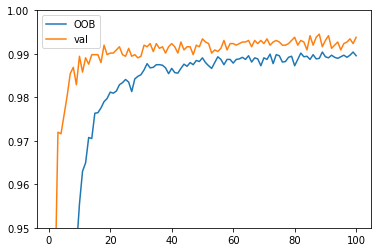

In [40]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
domain = range(1, len(scores_oob) + 1)
ax.plot(domain, scores_oob, label="OOB")
ax.plot(domain, scores_val, label="val")
ax.set_ylim([0.95,1.0])
ax.legend()
plt.show()